In [1]:
from google.colab import userdata
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!pip install kaggle
!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset --path datasets/   --unzip

Dataset URL: https://www.kaggle.com/datasets/rashikrahmanpritom/plant-disease-recognition-dataset
License(s): CC0-1.0
100% 1.25G/1.25G [00:41<00:00, 33.9MB/s]
100% 1.25G/1.25G [00:41<00:00, 32.1MB/s]


In [ ]:
train_path = '/content/datasets/Train/Train'
os.listdir(train_path)

['Healthy', 'Rust', 'Powdery']

In [ ]:
val_path = '/content/datasets/Validation/Validation'
os.listdir(val_path)

['Healthy', 'Rust', 'Powdery']

In [ ]:
test_path = '/content/datasets/Test/Test'
os.listdir(val_path)

['Healthy', 'Rust', 'Powdery']

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy


In [ ]:
SIZE = 256  # Define the desired image size

train_images = []
train_labels = []
# Iterate through subdirectories within `train_path`
for directory_path in glob.glob(os.path.join(train_path, "*")):
    # Extract the class label from the directory name
    label = os.path.basename(directory_path)
    print(label)

    # Handle potential empty directories gracefully (optional)
    if not os.listdir(directory_path):
        print(f"Skipping empty directory: {directory_path}")
        continue

    # Find all image files within the subdirectory
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        # print(img_path)

        # Read the image in grayscale mode
        img = cv2.imread(img_path, 0)

        # Resize the image
        img = cv2.resize(img, (SIZE, SIZE))

        # Append the image and label to the respective lists
        train_images.append(img)
        train_labels.append(label)

# Convert lists to NumPy arrays for efficient processing
train_images = np.array(train_images)
train_labels = np.array(train_labels)

print("Training data loaded:")
print(f"Number of images: {len(train_images)}")
print(f"Image shape: {train_images.shape[1:]}")  # Print image dimensions
print(f"Number of labels: {len(train_labels)}")
print(f"Unique labels: {np.unique(train_labels)}")  # View unique labels


Healthy
Rust
Powdery
Training data loaded:
Number of images: 1322
Image shape: (256, 256)
Number of labels: 1322
Unique labels: ['Healthy' 'Powdery' 'Rust']


In [ ]:
#Do exactly the same for test/validation images
# test
test_images = []
test_labels = []
#for directory_path in glob.glob("cell_images/test/*"):
for directory_path in glob.glob(os.path.join(test_path, "*")):
    # Extract the class label from the directory name
    label = os.path.basename(directory_path)
    # print(label)

    # Handle potential empty directories gracefully (optional)
    if not os.listdir(directory_path):
        print(f"Skipping empty directory: {directory_path}")
        continue

    # Find all image files within the subdirectory
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        # print(img_path)

        # Read the image in grayscale mode
        img = cv2.imread(img_path, 0)

        # Resize the image
        img = cv2.resize(img, (SIZE, SIZE))

        # Append the image and label to the respective lists
        test_images.append(img)
        test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
#Encode labels from text (folder names) to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded



In [ ]:
###################################################################
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    dfs = []
    for image in range(dataset.shape[0]):  #iterate through each file
        #print(image)

        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.

        img = dataset[image, :,:]
    ################################################################
    #START ADDING DATA TO THE DATAFRAME


         #Full image
        #GLCM = graycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = graycomatrix(img, [1], [0])
        GLCM_Energy = graycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = graycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr
        GLCM_diss = graycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss
        GLCM_hom = graycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom
        GLCM_contr = graycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr


        GLCM2 = graycomatrix(img, [3], [0])
        GLCM_Energy2 = graycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = graycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2
        GLCM_diss2 = graycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2
        GLCM_hom2 = graycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2
        GLCM_contr2 = graycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = graycomatrix(img, [5], [0])
        GLCM_Energy3 = graycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = graycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3
        GLCM_diss3 = graycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3
        GLCM_hom3 = graycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3
        GLCM_contr3 = graycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3

        GLCM4 = graycomatrix(img, [0], [np.pi/4])
        GLCM_Energy4 = graycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = graycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4
        GLCM_diss4 = graycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4
        GLCM_hom4 = graycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4
        GLCM_contr4 = graycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4

        GLCM5 = graycomatrix(img, [0], [np.pi/2])
        GLCM_Energy5 = graycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = graycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5
        GLCM_diss5 = graycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5
        GLCM_hom5 = graycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5
        GLCM_contr5 = graycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5

        #Add more filters as needed
        # entropy = shannon_entropy(img)
        # df['Entropy'] = entropy


        #Append features from current image to the dataset
        dfs.append(df)

    image_dataset = pd.concat(dfs, ignore_index=True)

    return image_dataset

In [ ]:
####################################################################
#Extract features from training images
image_features = feature_extractor(x_train)
X_for_ML =image_features
#Reshape to a vector for Random Forest / SVM training
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_ML = np.reshape(image_features, (x_train.shape[0], -1))  #Reshape to #images, features
X_for_ML.shape

(1322, 25)

In [ ]:
y_train.shape

(1322,)

In [ ]:
# X_for_ML.to_csv('features.csv')

In [ ]:
X_for_ML.shape[1]

25

In [ ]:
SIZE = 100
f_size = int(np.sqrt(X_for_ML.shape[1]))
def resize_input(np_image_features):
  np_image_features = np.array(np_image_features)
  Images = []
  for j in range(len(np_image_features)):
      my_image  = np_image_features[j].reshape(f_size,f_size)
      Image_feature = np.resize(my_image,(SIZE,SIZE, 1))
      Images.append(Image_feature)

  return np.array(Images)

X_train = resize_input(X_for_ML)
from keras.utils import to_categorical

# Convert integer labels to one-hot encoded format
y_train_categorical = to_categorical(y_train, num_classes=3)
y_test_categorical = to_categorical(y_test, num_classes=3)

In [ ]:
X_train.shape

(1322, 100, 100, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
glcmcnn = tf.keras.models.Sequential([layers.InputLayer(input_shape=[SIZE,SIZE, 1]),

    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(50,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),

    layers.Dense(3, activation='softmax'),])

In [ ]:
glcmcnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)
glcmcnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 21, 21, 50)        28850     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 10, 10, 50)       

In [ ]:
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=10, restore_best_weights=True)
history = glcmcnn.fit(
    x = X_train,
    y=y_train_categorical,
    validation_split = 0.1,
    # validation_data = (X_val, y_val_categorical),
    batch_size=32,
    epochs=50#,
    #callbacks=early_stopping
  )

Epoch 1/50
38/38 [==============================] - 3s 50ms/step - loss: 8.3084 - accuracy: 0.3490 - val_loss: 1.3304 - val_accuracy: 0.0000e+00
Epoch 2/50
38/38 [==============================] - 2s 42ms/step - loss: 1.0862 - accuracy: 0.3675 - val_loss: 1.2062 - val_accuracy: 0.3684
Epoch 3/50
38/38 [==============================] - 2s 41ms/step - loss: 1.0341 - accuracy: 0.4146 - val_loss: 1.3022 - val_accuracy: 0.1353
Epoch 4/50
38/38 [==============================] - 2s 42ms/step - loss: 1.0490 - accuracy: 0.4121 - val_loss: 1.5304 - val_accuracy: 0.2030
Epoch 5/50
38/38 [==============================] - 2s 40ms/step - loss: 1.0496 - accuracy: 0.4264 - val_loss: 1.1731 - val_accuracy: 0.1278
Epoch 6/50
38/38 [==============================] - 1s 38ms/step - loss: 1.0330 - accuracy: 0.4323 - val_loss: 1.1561 - val_accuracy: 0.4211
Epoch 7/50
38/38 [==============================] - 2s 41ms/step - loss: 0.9908 - accuracy: 0.4853 - val_loss: 1.6632 - val_accuracy: 0.0376
Epoch 8/5

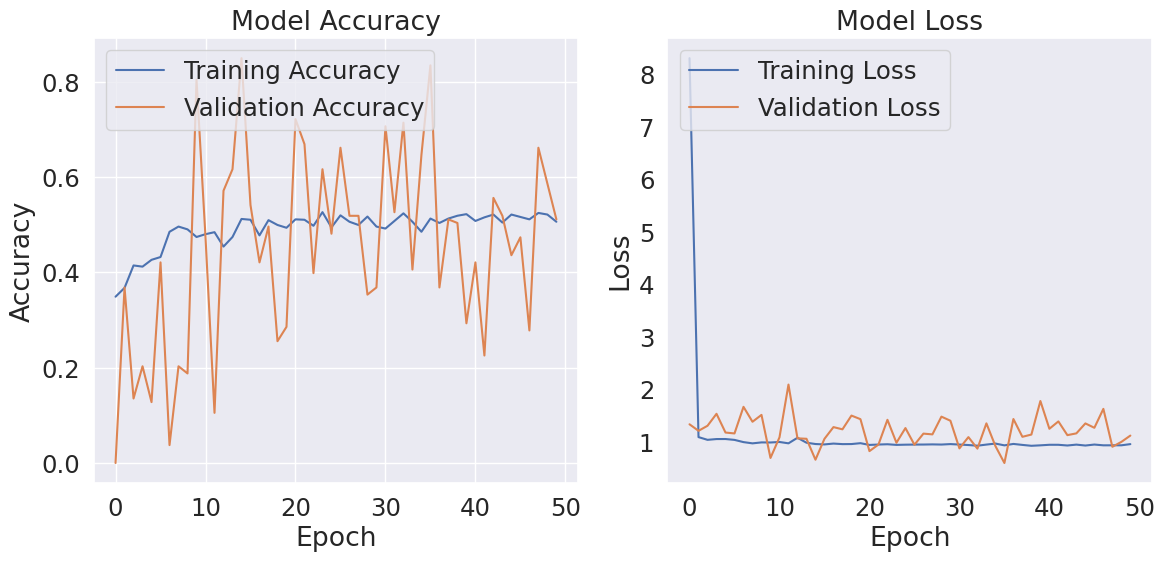

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.grid()
plt.show()


In [ ]:
class_map = {
    'Healthy': 0, 'Powdery': 1, 'Rust': 2
}

In [ ]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
# test_features = np.expand_dims(test_features, axis=0)
test_for_RF = resize_input(test_features)

#Predict on test
test_prediction = glcmcnn.predict(test_for_RF)
test_prediction=np.argmax(test_prediction, axis=1)
#Inverse le transform to get original label back.
test_prediction = le.inverse_transform(test_prediction)

5/5 [==============================] - 0s 8ms/step


Accuracy =  0.48
Accuracy =                precision    recall  f1-score   support

     Healthy       0.44      0.46      0.45        50
     Powdery       0.53      0.48      0.51        50
        Rust       0.47      0.50      0.49        50

    accuracy                           0.48       150
   macro avg       0.48      0.48      0.48       150
weighted avg       0.48      0.48      0.48       150



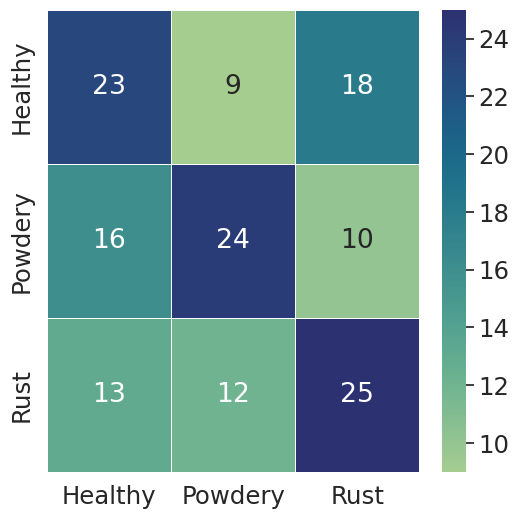

In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))
print ("Accuracy = ", metrics.classification_report(test_labels, test_prediction))

#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax, xticklabels=class_map, yticklabels=class_map, cmap = 'crest')
plt.show()

1/1 [==============================] - 0s 23ms/step
The prediction for this image is:  ['Powdery']
The actual label for this image is:  Healthy


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


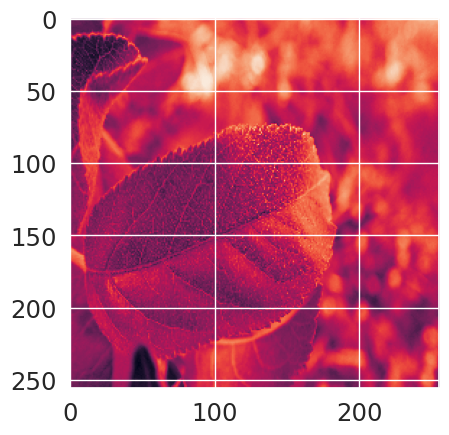

In [ ]:
#Check results on a few random images
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
# input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = resize_input(input_img_features)
#Predict
img_prediction = glcmcnn.predict(input_img_for_RF)
img_prediction=np.argmax(img_prediction, axis=1)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])